# Tutorial Time- Visualization Data

<span style="color:blue"> This tutorial is based on the provided data and information in Lesson 6 in Bertelsmann Data Science Challenge <br/>
Prepared with love by Gasia Atashian
    </span>

# Setup

<span style="color:blue">
import libraries <br/>
numpy is the fundamental package for scientific computing with Python <br/>
pandas is used for data structures and data analysis tools <br/>
matplotlib is a plotting library to generate plots <br/>
ps: # is used for comments
</span>

In [1]:
# usually the libraries are imported with a shorter name 
#(you can use any alias but np, pd and plt are the most common) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to make the output of plotting commands display inline within jupyter notebook
%matplotlib inline  

# Data

<span style="color:blue">
This data is part of a poll that was created on Bertelsmann Udacity Data Science Scholarship facebook page <br/>
</span>

In [2]:
# {} means dictinary type, where we can map a key to a value
#note that keys should be unique, values don't have to

country_dictionary ={'Brazil': 425, 'Germany': 347, 'USA': 305,
                   'India': 159, 'Poland': 132, 'Egypt': 98, 'Nigeria':59,
                   'United Kingdom': 57, 'Romania': 46, 'Italy': 34,
                   'Canada': 33, 'Indonesia': 32, 'Philippins': 30,
                   'Portugal': 29, 'Pakistan': 28, 'Greece':28, 'Spain': 27,
                   'Turkey': 24, 'Hungary': 20, 'Netherlands': 24, 'Maxico': 18,
                   'Croatia': 17, 'Austria': 17, 'France': 16, 'Ireland': 15,
                   'Czech Republic': 15, 'Nepal': 14, 'Ruassia': 14, 'Taiwan': 14,
                   'Singapore': 14, 'Israel': 12, 'Australia': 12, 'Vietnam': 11,
                   'China': 11, 'Ghana':11, 'South Africa': 10, 'Thailand': 10, 
                   'Belgium': 10, 'Switzerland': 10, 'Finland': 9, 'Kenya': 9,
                   'Latvia': 9, 'Bulgaria': 9, 'Ukraine': 9, 'Sweden': 9, 'Luthania':9,
                   'Bangladesh': 8, 'Hong Kong': 8, 'Palestine': 7, 'Jordan': 7,
                   'Norway': 7, 'Costa Rica': 7, 'Estonia': 7, 'Tunisia': 7,
                   'Algeria': 6, 'Japan': 6, 'Slovenia': 6, 'Denmark': 6, 'Rwanda':5,
                    'Peru': 5, 'Luxembourg': 5, 'Morocco':5, 'Cameroon': 5,
                   'Sri Lanka': 5, 'Bolivia': 5, 'Republic of Korea': 5, 'Argentina': 4, 
                   'Colombia': 4, 'Dominican Republic': 3, 'Macedonia': 3, 'Iraq': 3,
                   'North Cyprus': 3, 'Slovakia': 3, 'Armenia': 3, 'Uzbekistan': 3,
                   'Zimbabwe': 3, 'Syria': 2, 'Tanzania': 2, 'Ecuador': 2, 'El Salvador': 2, 'The Bahamas': 2,
                   'Viet Nam': 2, 'Kosovo': 2, 'Paraguay': 2, 'Spain': 2, 'Kuwait': 2, 'Libya': 2,
                   'Sudan': 2, 'Belarus': 2, 'Nicaragua': 1, 'Iran':1, 'Niger':1,
                   'Guatemala': 1, 'South Korea': 1, 'Panama': 1, 'Cambodia': 1,
                   'Lesotho': 1, 'Ethiopia': 1, }

# DataFrame

In [3]:
# Convert the dictionary to a dataframe (table)
#It is convenient to name df for dataframe 

df_country = pd.Series(country_dictionary, name='Frequency')
df_country.index.name = 'Country'
df_country = df_country.reset_index()

# Experiments on DataFrame

In [4]:
df_country.head() #it shows first 5 data from the dataframe (you can specify a number)

,Country,Frequency
0,Algeria,6
1,Argentina,4
2,Armenia,3
3,Australia,12
4,Austria,17


In [5]:
df_country.tail(8) #by default it shows last 5 data from the dataframe 

,Country,Frequency
89,Turkey,24
90,USA,305
91,Ukraine,9
92,United Kingdom,57
93,Uzbekistan,3
94,Viet Nam,2
95,Vietnam,11
96,Zimbabwe,3


----------------

# Statistics

In [6]:
df_country.describe() # it gives some statistics

,Frequency
count,97.000000
mean,24.876289
std,65.212674
min,1.000000
25%,3.000000
50%,7.000000
75%,15.000000
max,425.000000


In [7]:
sorted_df_country = df_country.sort_values(['Frequency'], ascending=False)

In [8]:
sorted_df_country.head()

,Country,Frequency
9,Brazil,425
28,Germany,347
90,USA,305
34,India,159
67,Poland,132


In [9]:
# let's reset the index of the sorted dataframe
sorted_df_country = sorted_df_country.reset_index(drop=True) #drop=True means do not save the old index as a column

In [10]:
sorted_df_country.head()

,Country,Frequency
0,Brazil,425
1,Germany,347
2,USA,305
3,India,159
4,Poland,132


In [11]:
# access a column:
sorted_df_country['Frequency'].head()

0    425
1    347
2    305
3    159
4    132
Name: Frequency, dtype: int64

In [12]:
#to access the values in a column
sorted_df_country['Frequency'].values #not it returns a numpy ndarray

array([425, 347, 305, 159, 132,  98,  59,  57,  46,  34,  33,  32,  30,
        29,  28,  28,  24,  24,  20,  18,  17,  17,  16,  15,  15,  14,
        14,  14,  14,  12,  12,  11,  11,  11,  10,  10,  10,  10,   9,
         9,   9,   9,   9,   9,   9,   8,   8,   7,   7,   7,   7,   7,
         7,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   5,   5,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,
         1,   1,   1,   1,   1,   1])

In [13]:
# you can see the type by:
type(sorted_df_country['Frequency'].values)

numpy.ndarray

## Relative Frequency

<span style="color:blue">
from lesson 6 <br/>
let's calculate the relative frequency <br/>
first we sum the Frequency column, then divide each row by the summed number
    </span>

In [14]:
freq_sum = np.sum(sorted_df_country['Frequency'].values)

print('frequency sum is %d' % freq_sum) #to display

# or you can write 
print('frequency sum is', freq_sum)

#to add a new column to a dataframe, assign df['new_column_name'] to a value
sorted_df_country['Relative_Frequency'] = sorted_df_country['Frequency']/ freq_sum

frequency sum is 2413
frequency sum is 2413


In [15]:
sorted_df_country.head()

,Country,Frequency,Relative_Frequency
0,Brazil,425,0.176129
1,Germany,347,0.143804
2,USA,305,0.126399
3,India,159,0.065893
4,Poland,132,0.054704


In [16]:
sorted_df_country['Percent_%'] = sorted_df_country['Relative_Frequency'] *100

In [17]:
sorted_df_country.head()

,Country,Frequency,Relative_Frequency,Percent_%
0,Brazil,425,0.176129,17.612930
1,Germany,347,0.143804,14.380439
2,USA,305,0.126399,12.639867
3,India,159,0.065893,6.589308
4,Poland,132,0.054704,5.470369


# Age Data

####  <span style="color:blue"> same sample data that is used in Lesson 6: 13 </span>

In [18]:
age_data = [15,27,22,24,24,18,19,30,20,75,19,16,15,20,27,39,28,20,23,19,18,65,24,45,18,10,53,21,18,63,
            14,15,22,22,66,30,28,20,41,14,13,31,51,33,15,13,65,18,52,18]

In [19]:
#a useful library next we will see the usage
from collections import Counter

In [20]:
#It gives the frequency of each age 
Counter(age_data)

Counter({10: 1,
         13: 2,
         14: 2,
         15: 4,
         16: 1,
         18: 6,
         19: 3,
         20: 4,
         21: 1,
         22: 3,
         23: 1,
         24: 3,
         27: 2,
         28: 2,
         30: 2,
         31: 1,
         33: 1,
         39: 1,
         41: 1,
         45: 1,
         51: 1,
         52: 1,
         53: 1,
         63: 1,
         65: 2,
         66: 1,
         75: 1})

In [21]:
#sort the counted values
Counter(age_data).most_common()

[(18, 6),
 (15, 4),
 (20, 4),
 (22, 3),
 (24, 3),
 (19, 3),
 (27, 2),
 (30, 2),
 (28, 2),
 (65, 2),
 (14, 2),
 (13, 2),
 (75, 1),
 (16, 1),
 (39, 1),
 (23, 1),
 (45, 1),
 (10, 1),
 (53, 1),
 (21, 1),
 (63, 1),
 (66, 1),
 (41, 1),
 (31, 1),
 (51, 1),
 (33, 1),
 (52, 1)]

In [22]:
df_age = pd.DataFrame(age_data, columns =['age'])

In [23]:
df_age.head(5)

,age
0,15
1,27
2,22
3,24
4,24


# Group the data in bins of size 20

In [24]:
#pd.cut return indices of half-open bins to which each value of x belongs ()
# np.array([0,19,39,59,79]) specifies the cut place
df_age['bins_20'] = pd.cut(df_age["age"], np.array([0,19,39,59,79]))

In [25]:
df_age.head()

,age,bins_20
0,15,"(0, 19]"
1,27,"(19, 39]"
2,22,"(19, 39]"
3,24,"(19, 39]"
4,24,"(19, 39]"


# Frequency table of age:

In [26]:
#same result as in Lesson 6: 13
Counter(df_age['bins_20'].values)
#ps: closed right means teh interval is (0:19] 19 is included, 0 is not include

Counter({Interval(0, 19, closed='right'): 19,
         Interval(19, 39, closed='right'): 21,
         Interval(39, 59, closed='right'): 5,
         Interval(59, 79, closed='right'): 5})

# Histogram using Age Data

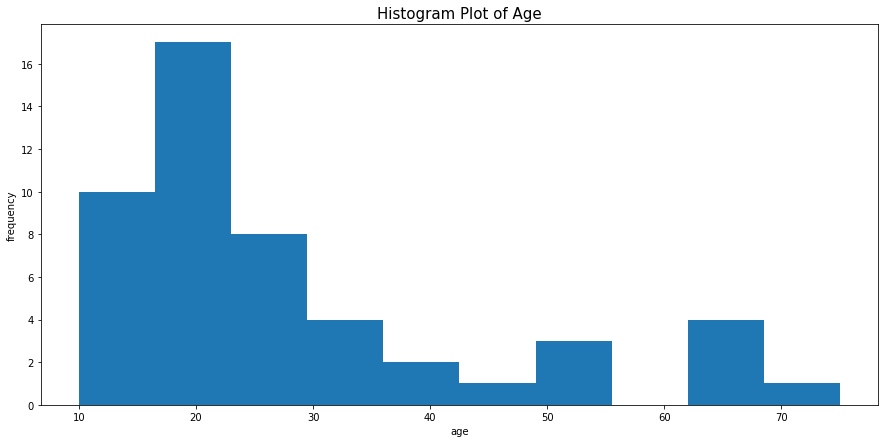

In [27]:
plt.figure(figsize=(15,7)) #size of plot width, height
plt.hist(df_age['age'])
plt.xlabel('age') # x axis labels
plt.ylabel('frequency') # y axis labels
plt.title('Histogram Plot of Age', fontsize=15) #title of the plot
plt.show() # show the plot

<span style="color:blue">
By default the number of bins are 10 <br/>
specifying the number of bins: <br/>
20 bins
   </span>

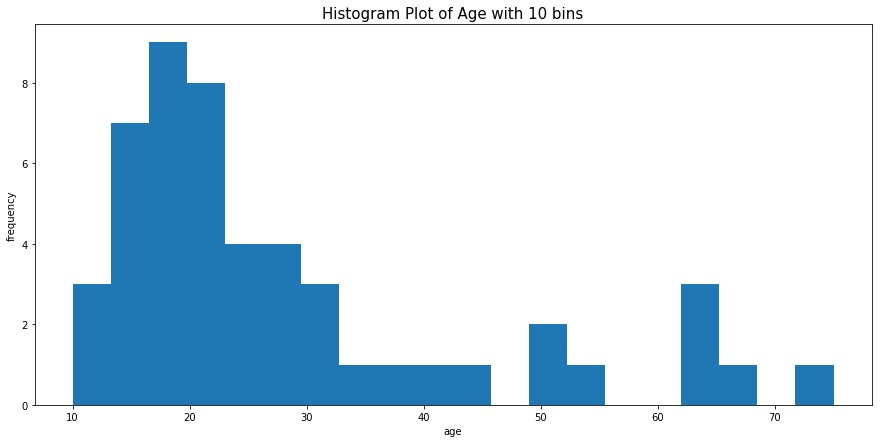

In [28]:
plt.figure(figsize=(15,7)) #size of plot width, height
plt.hist(df_age['age'], bins = 20)
plt.xlabel('age') # x axis labels
plt.ylabel('frequency') # y axis labels
plt.title('Histogram Plot of Age with 10 bins', fontsize=15) #title of the plot
plt.show() # show the plot

<span style="color:blue"> 4 bins </span>

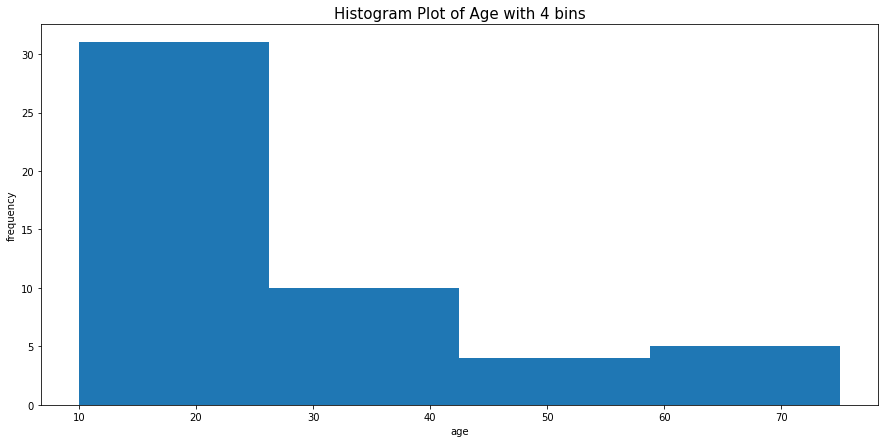

In [29]:
plt.figure(figsize=(15,7)) #size of plot width, height
plt.hist(df_age['age'], bins = 4)
plt.xlabel('age') # x axis labels
plt.ylabel('frequency') # y axis labels
plt.title('Histogram Plot of Age with 4 bins', fontsize=15) #title of the plot
plt.show() # show the plot

<span style="color:blue">
One more trick, you can use relative frequency instead of frequendy with specifying density=True, by default it is False </span>

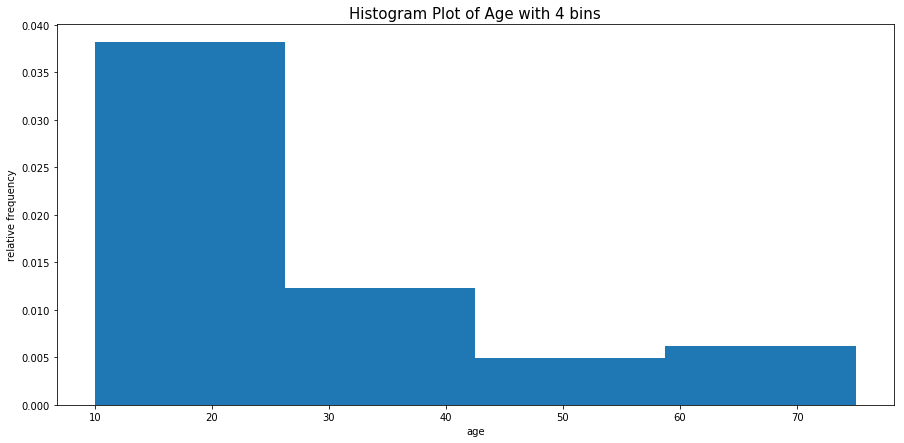

In [30]:
plt.figure(figsize=(15,7)) #size of plot width, height
plt.hist(df_age['age'], bins = 4, density=True)
plt.xlabel('age') # x axis labels
plt.ylabel('relative frequency') # y axis labels
plt.title('Histogram Plot of Age with 4 bins', fontsize=15) #title of the plot
plt.show() # show the plot

--------------------

# Back to Country Data

# Bar plot

<span style="color:blue">
Moving to Leeson 6:24 </span>

In [31]:
data =country_dictionary

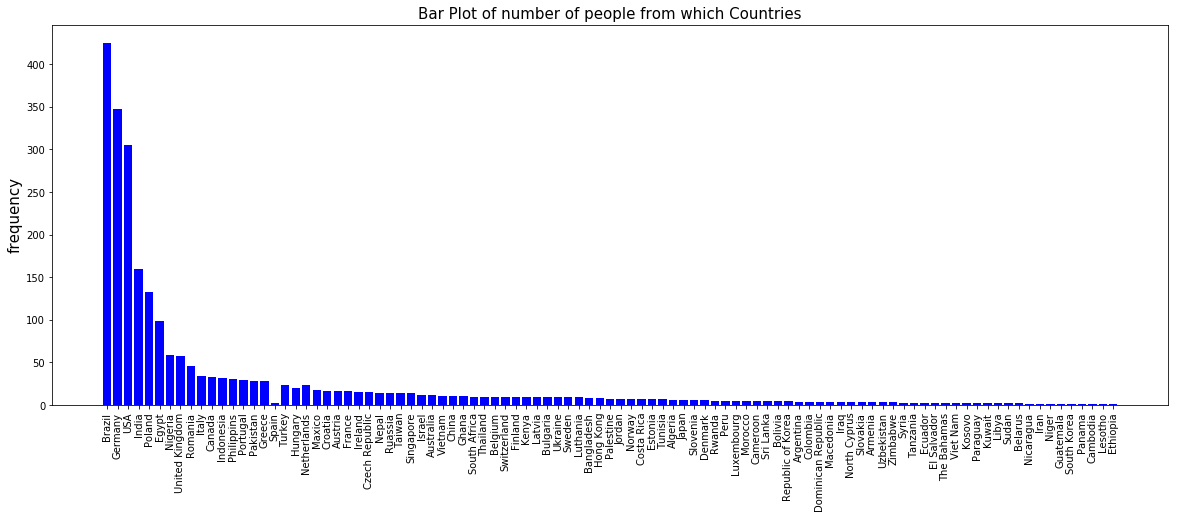

In [32]:
plt.figure(figsize = (20,7)) #size of plot width, height
plt.bar(range(len(data)), list(data.values()), align='center', color ='blue') # bar plot
plt.xticks(range(len(data)), list(data.keys()), rotation='vertical') # x axis labels
plt.title('Bar Plot of number of people from which Countries', fontsize=15) #title of the plot
plt.ylabel('frequency', fontsize=(15)) # y axis name
plt.show() # show the plot

# Pie Chart

In [33]:
key_list = [k for k in country_dictionary.keys()] #put the keys of the dictionary in a list
value_list = [k for k in country_dictionary.values()] #put the values of the dictionary in a list

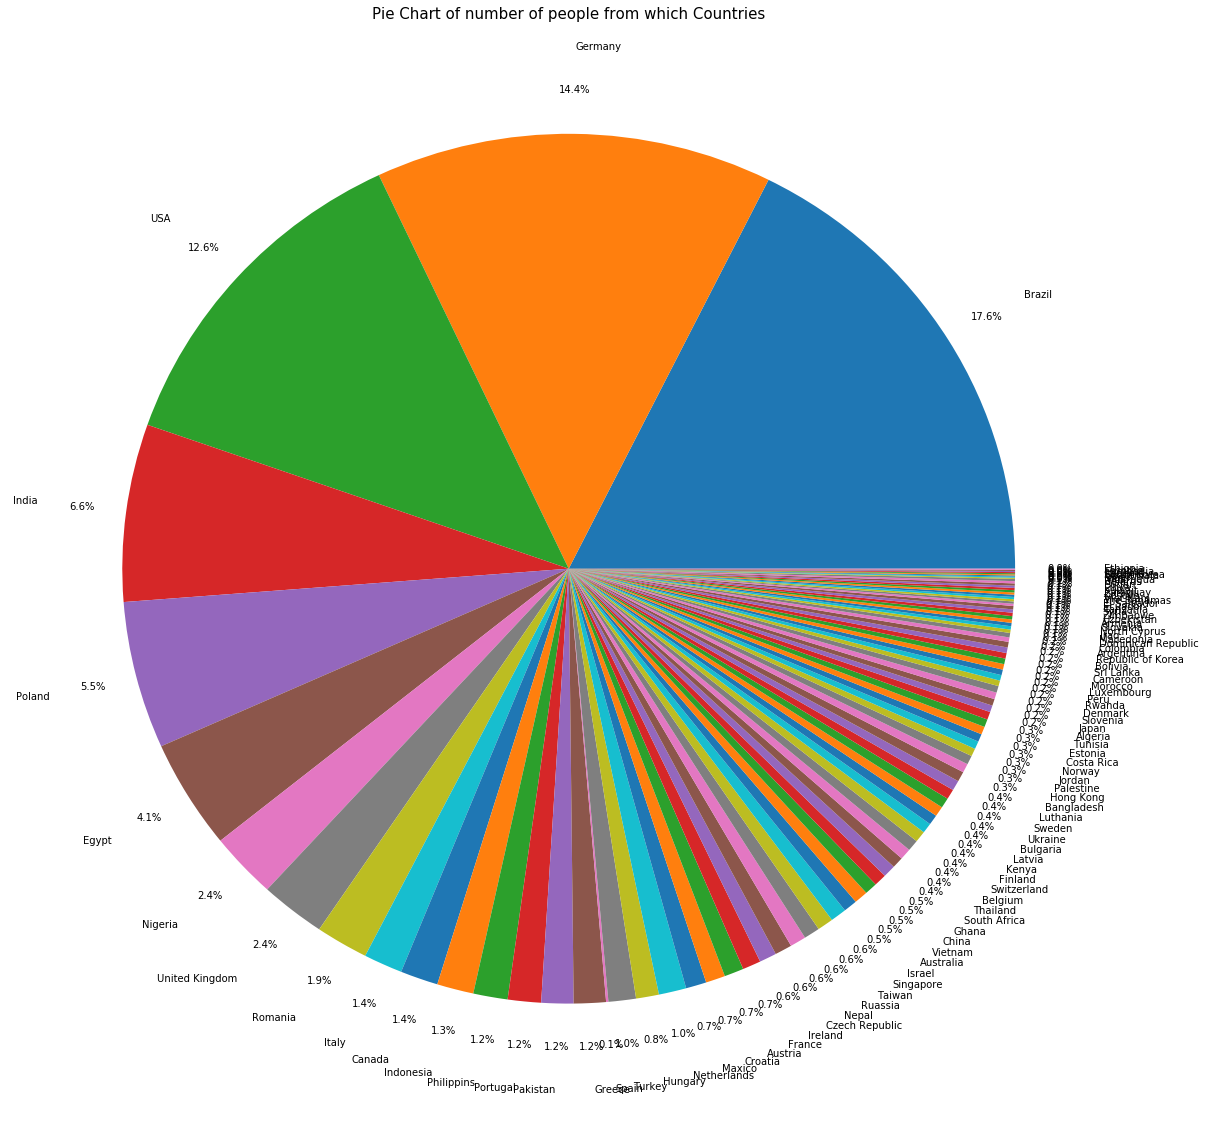

In [34]:
plt.figure(figsize=(20,20))
plt.pie(value_list, labels= key_list, autopct='%1.01f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Pie Chart of number of people from which Countries', fontsize=15, color='black')
plt.show()

## Sort the dictionary by its values in a list

In [35]:
sorted_country_list = [[k, country_dictionary[k]] for k in sorted(country_dictionary, key=country_dictionary.get, reverse=True)]

In [36]:
print(sorted_country_list)

[['Brazil', 425], ['Germany', 347], ['USA', 305], ['India', 159], ['Poland', 132], ['Egypt', 98], ['Nigeria', 59], ['United Kingdom', 57], ['Romania', 46], ['Italy', 34], ['Canada', 33], ['Indonesia', 32], ['Philippins', 30], ['Portugal', 29], ['Pakistan', 28], ['Greece', 28], ['Turkey', 24], ['Netherlands', 24], ['Hungary', 20], ['Maxico', 18], ['Croatia', 17], ['Austria', 17], ['France', 16], ['Ireland', 15], ['Czech Republic', 15], ['Nepal', 14], ['Ruassia', 14], ['Taiwan', 14], ['Singapore', 14], ['Israel', 12], ['Australia', 12], ['Vietnam', 11], ['China', 11], ['Ghana', 11], ['South Africa', 10], ['Thailand', 10], ['Belgium', 10], ['Switzerland', 10], ['Finland', 9], ['Kenya', 9], ['Latvia', 9], ['Bulgaria', 9], ['Ukraine', 9], ['Sweden', 9], ['Luthania', 9], ['Bangladesh', 8], ['Hong Kong', 8], ['Palestine', 7], ['Jordan', 7], ['Norway', 7], ['Costa Rica', 7], ['Estonia', 7], ['Tunisia', 7], ['Algeria', 6], ['Japan', 6], ['Slovenia', 6], ['Denmark', 6], ['Rwanda', 5], ['Peru', 5

####  <span style="color:blue"> Nevertheless it is easier to use the dataframe to sort</span>

In [37]:
df_country.sort_values(['Frequency'], ascending=False).reset_index(drop=True).head(10)

,Country,Frequency
0,Brazil,425
1,Germany,347
2,USA,305
3,India,159
4,Poland,132
5,Egypt,98
6,Nigeria,59
7,United Kingdom,57
8,Romania,46
9,Italy,34


--------------------------------

# <center>THE END</center>
# <center>GASIA ATASHIAN</center>